In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

In [2]:
# Load data
data_path = 'solar_generation_selected_features.csv'
solar_data = pd.read_csv(data_path)

In [3]:
# Define features and target variable
X = solar_data.drop('Solar Production (kWh)', axis=1)
y = solar_data['Solar Production (kWh)']

# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# # Split the dataset into training (80%) and testing (20%) sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Splitting the data into training and testing sets (80% training and 20% testing)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Further splitting the training data into training and validation sets
# (60% of the original data for training, 20% for validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

In [4]:
# Create Gradientboost Regressor object
gredient_regressor = GradientBoostingRegressor(max_depth=5, n_estimators=250, learning_rate=0.05)

# Train GradientBoost Regressor
gb_model = gredient_regressor.fit(X_train, y_train)

In [5]:
# Predict the response for validation data
y_val_pred = gb_model.predict(X_val)

# Calculate performance metrics on validation data
r2_val_gb = r2_score(y_val,y_val_pred)
mse_val_gb = mean_squared_error(y_val, y_val_pred)
rmse_val_gb = np.sqrt(mse_val_gb)
mae_val_gb = mean_absolute_error(y_val, y_val_pred)

print(f'R2_score: {r2_val_gb}')
print(f'Mean Square Error: {mse_val_gb}')
print(f'Root Mean Square Error: {rmse_val_gb}')
print(f'Mean Absolute Error: {mae_val_gb}')

R2_score: 0.9292912571086553
Mean Square Error: 0.17990192464880728
Root Mean Square Error: 0.42414847005359724
Mean Absolute Error: 0.21062715028968287


In [6]:
# Predict on the test data
y_pred = gb_model.predict(X_test)

# Calculate performance metrics on test data
r2_gb = r2_score(y_pred,y_test)
mse_gb = mean_squared_error(y_pred, y_test)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test, y_pred)

print(f'R2_score: {r2_gb}')
print(f'Mean Square Error: {mse_gb}')
print(f'Root Mean Square Error: {rmse_gb}')
print(f'Mean Absolute Error: {mae_gb}')

R2_score: 0.928558077808079
Mean Square Error: 0.18272372529924927
Root Mean Square Error: 0.42746195772167755
Mean Absolute Error: 0.20877214735316701


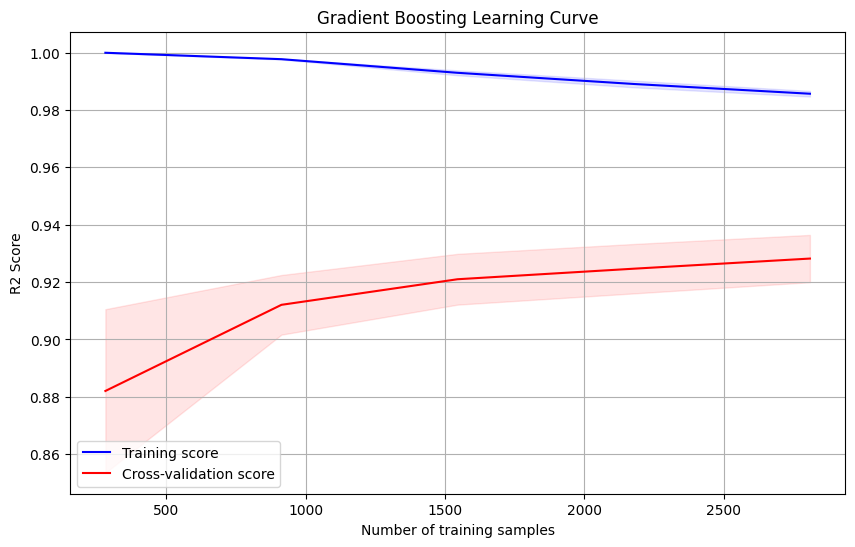

In [7]:
# Plot Learning Curves
train_sizes, train_scores, test_scores = learning_curve(gb_model, X_train, y_train, cv=5, scoring='r2')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.1)
plt.title('Gradient Boosting Learning Curve')
plt.xlabel('Number of training samples')
plt.ylabel('R2 Score')
plt.legend()
plt.grid()
plt.show()

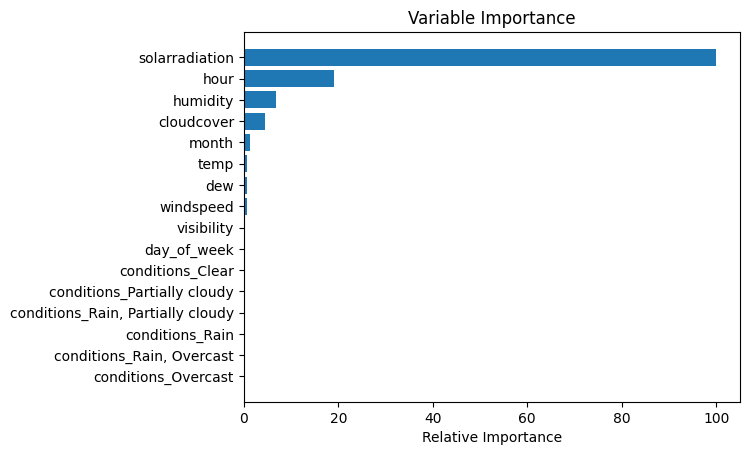

In [8]:
# Plot feature importance
feature_importance = gb_model.feature_importances_

# make importance relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [9]:
# Hyperparameter Tuning: It will take some time to tune hyperparameters and fing the best one
# LR = {'learning_rate': [0.15, 0.1, 0.05, 0.01,], 'n_estimators': [100, 150, 200, 250, 500], 'max_depth': [3, 4, 5]}
# tuning = GridSearchCV(estimator= GradientBoostingRegressor(), param_grid= LR, scoring= 'r2')
# tuning.fit(X_train, y_train)
# tuning.best_params_, tuning.best_score_

# Results: Here I am mentioning results from the hyperparameter tuning because each time when I run, it will take so much time
# and the result will be same after tuning again and again as per the provided hypeparameter values
# ({'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 250}, 0.9291706651348747)

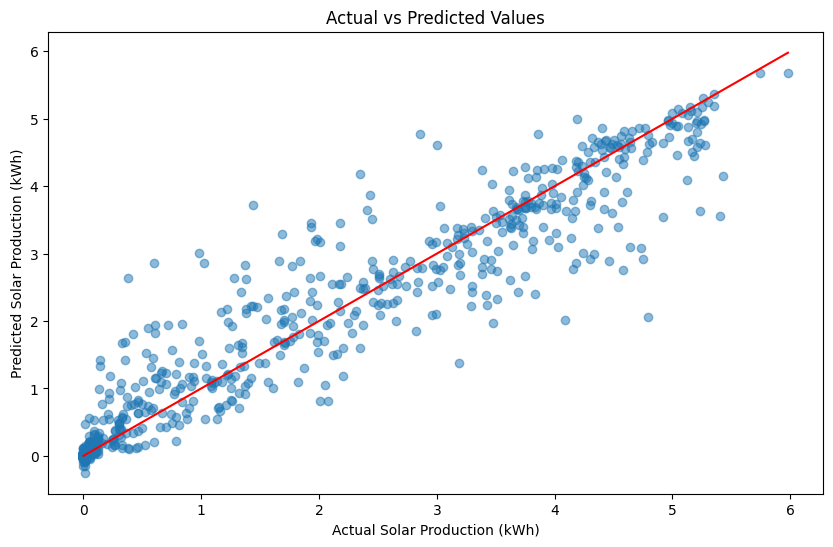

In [10]:
#actual vs predicted values for GB model
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Solar Production (kWh)')
plt.ylabel('Predicted Solar Production (kWh)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Diagonal line
plt.show()

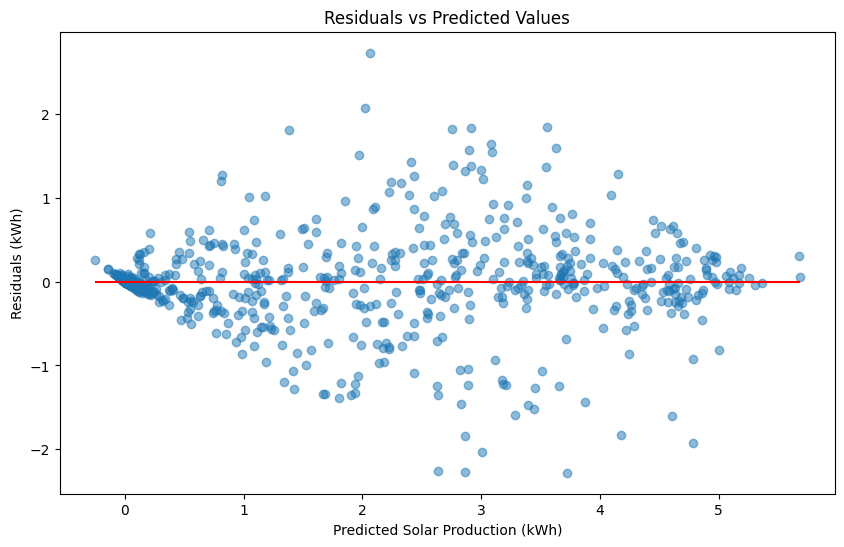

In [11]:
#residuals plot for GB model
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Solar Production (kWh)')
plt.ylabel('Residuals (kWh)')
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red')
plt.show()